# Contents of this notebook:
- Plot of the ASCII dump of the residual file (FORT19)
- How to read and plot residuals in the iieout file
- Looking into some of the (confusing) contents of the iieout file and plotting them


## Notes:
  - The results shown here are from the example files that Frank sent.  Starlette tracking
  - The residual in the ASCII file are ever so slightly different from iteration 5 in the iieout file. 
  - As of 11/12 the iieout file that David Rowlands set up does not contain the obseravtion residuals that ARE the residuals in the residual file
  - the ephemeris data is also not in this file
  -



## Import relevant packages and identify the data location 

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import os.path


In [ ]:
# import sys  
# sys.path.insert(0, '/content/drive/My Drive/GEODYN-KAMODO Project/')

runs_path = '/content/drive/My Drive/GEODYN-KAMODO Project/Examples_from_FrankLemoine/starletteexampletar/'
file = runs_path + 'ascii_st191201_2wk'


#### Test import of the data:
(If you uncomment print, be aware that its a big data file)

In [ ]:
with open(file) as f:
    read_data = f.read()
    # print(read_data)

## Load ASCII RESID file into a dataframe using pandas

In [ ]:
resid_ascii = pd.read_csv(file, 
#                                    skiprows = 94450 ,  # to 95236
#                                    skiprows = lambda x: logic(x),
#                                                  nrows = 680 ,
       
                          names = ['SatID',         #  7501001
                                  'StationName',   #  CHAC7237
                                  'StationNumber', #  72371901
                                  'ID1',           #  SLRRN
                                  'ID2',           #  51
                                  'MJD',           #  58818.289771
                                  'Date_Int',           #  2019.915862
                                  'RESIDUAL',           #  -3.267863
                                  '???',            #  NOT SURE WHAT THIS IS
                                  'date_raw',           #  201912010657
                                  'Sec_ithink',           #  16.18
                                  'ms_ithink', ]     ,      #  0
                                   sep = '\s+', )
resid_ascii.head()

,SatID,StationName,StationNumber,ID1,ID2,MJD,Date_Int,RESIDUAL,???,date_raw,Sec_ithink,ms_ithink
0,7501001,CHAC7237,72371901,SLRRN,51,58818.289471,2019.915862,-3.123887,55.945,201912010656,50.34,0
1,7501001,CHAC7237,72371901,SLRRN,51,58818.289771,2019.915862,-3.267863,47.678,201912010657,16.18,0
2,7501001,CHAC7237,72371901,SLRRN,51,58818.290105,2019.915863,-1.394121,39.900,201912010657,45.11,0
3,7501001,CHAC7237,72371901,SLRRN,51,58818.290428,2019.915864,-0.533537,33.716,201912010658,12.99,0
4,7501001,CHAC7237,72371901,SLRRN,51,58818.291163,2019.915866,1.604366,23.149,201912010659,16.44,0


#### Fix the Dates

In [ ]:
date =[]
for i,val in enumerate(resid_ascii['date_raw']):
#     print(i,val)
    A = str(val)
#     year = A[:4]
#     month = A[4:6]
#     day = A[6:8]
#     hour = A[8:10]
#     minute = A[10:12]

    date.append(datetime.datetime(year=int(A[:4]), month=int(A[4:6]), day=int(A[6:8]), hour = int(A[8:10]),  minute = int(A[10:12])))

resid_ascii['Date'] =  date 

#### Plot the ASCII file Residuals

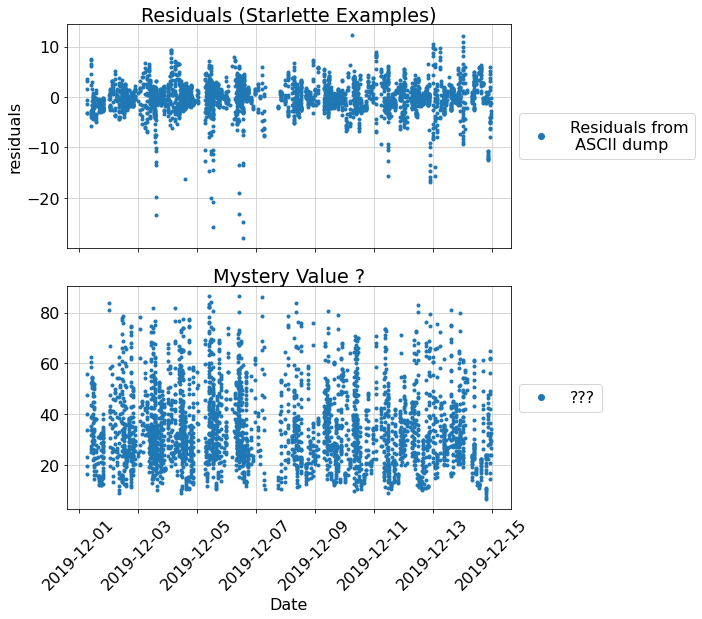

In [ ]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
# rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True)
ax1.set_title('Residuals (Starlette Examples)')
ax1.plot(resid_ascii['Date'], resid_ascii['RESIDUAL'] ,'.', label = 'Residuals from\n ASCII dump')
ax1.set(ylabel=  'residuals')  

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )
ax2.set_title('Mystery Value ?')
ax2.plot(resid_ascii['Date'],resid_ascii['???'] ,'.', label = '???')
# ax2.set(ylabel=  'RMS')  

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


# ax2.set(xlabel= 'Modified Julian Date') 
ax2.set(xlabel= 'Date') 

fig.tight_layout( pad=1.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

    
    


## Read in the IIEOUT file  Residuals

- Above are the residuals from the FORT19 dedicated residuals file.  
- Need to cross reference that these FORT19 Residuals match the residuals in the IIEOUT file so that we can just use IIEOUT (because its "easily" read into Python)

In [ ]:
iieout_file = runs_path + 'iieout_st191201_2wk.goco05s'
print(iieout_file)
os.path.isfile(iieout_file) 


/content/drive/My Drive/GEODYN-KAMODO Project/Examples_from_FrankLemoine/starletteexampletar/iieout_st191201_2wk.goco05s


True

#### Method:
- Search through the IIEOUT file for key phrases (**Section Headers of Sorts**)
- Read in the data after the section header
  - some manual double-checking is required that this is done correctly

#### Section Header Options:
this depends on what iieout was sent (*still trying to figure this out*)
- RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  1 OF GLOBAL ITERATION 1
- RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  1 OF GLOBAL ITERATION 1
- OBSERVATION RESIDUALS FOR ARC  1 FOR INNER ITERATION  





#### **Issue to be aware of:**
- Format of the IIEOUT file is correct 
    - specifically, be sure that the columns being read in are correct in the pd.read_csv()
    - If all IIEOUT files are different, these functions may not be able to be universally used.  Some modifcation may be required

##### Functions:


In [ ]:
def search_iiesout_line_numbers(iieout_file, text_1, text_2):
  '''
  Pupose:
  This function loops thru every line of the IIEOUT file and finds
  the line numbers that contain the text provided.
  The provided text will be the Section Headers
  '''
  with open(iieout_file, 'r') as f:

        for line_no, line in enumerate(f):
            if text_1 in line:
#                 print(line_no)
                line_no_1 = line_no
            if text_2 in line:
#                 print(line_no)
                line_no_2 = line_no
    
  return(line_no_1, line_no_2)    
    


def create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2):

  '''
  Pupose:
  This calls the search_iiesout_line_numbers() to locate the location of the 
  section header then reads in the data as a pandas CSV.
  The CSV is then converted to a pd.DataFrame and any rows that do not contain 
  the data are removed.
  '''

  ARC_1_INNER_ITERATION_1_OFGLOBAL_1 = pd.read_csv(iieout_file, 
                                      skiprows = line_no_1+1+1 ,  # to 53917
                                        nrows =  int((line_no_2 - line_no_1) /2)-1,
                            names = ['Number', 
                                    'Mean',
                                    'RMS',
                                    'No.-WTD',
                                    'WTD-MEAN',
                                    'WTD-RMS',
                                    'WTD-RND',
                                    'TYPE_1',
                                    'TYPE_2',
                                    'TYPE_3',
                                    'CONFIG'],
                            sep = '\s+',
                            )

  A = ARC_1_INNER_ITERATION_1_OFGLOBAL_1
  A = pd.DataFrame(A)

  for index, row in A.iterrows():
      try:
  #         print( (row['Mean']),'\n')
          float(row['Mean'])
          if abs(float(row['Mean'])) > 10000 :
              A=A.drop(index)
          else:
              continue
  #             print('All good here')
      except:
  #         print('Cant Be converted to float')
          A=A.drop(index) 
  return(A)

#### Residuals by Station

- Denoted by: RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC 1 INNER ITERATION 1 OF GLOBAL ITERATION 1
- This section is ended at each iteration when the MEASUREMENT section begins



In [ ]:
iteration = np.str(1)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter1 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)
ResSum_station_iter1.head()

,Number,Mean,RMS,No.-WTD,WTD-MEAN,WTD-RMS,WTD-RND,TYPE_1,TYPE_2,TYPE_3,CONFIG
0,277,-1.3498,7.6315,277,-6.7489,38.1575,49.3241,2W,RANGE,CHAC7237,7501001.0
1,85,-0.2877,6.1211,85,-1.4384,30.6053,56.4923,2W,RANGE,MATE7941,7501001.0
2,68,-1.0547,3.2370,68,-1.0547,3.2370,12.7713,2W,RANGE,SOSW7827,7501001.0
3,744,0.2244,4.5008,744,2.2440,45.0077,118.4204,2W,RANGE,STL37825,7501001.0
4,78,-0.5922,6.3295,78,-5.9222,63.2947,14.7417,2W,RANGE,AREL7403,7501001.0


In [ ]:
iteration = np.str(2)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter2 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


In [ ]:
iteration = np.str(3)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter3 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


In [ ]:
iteration = np.str(4)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

# text_1
line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter4 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


In [ ]:
iteration = np.str(5)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

# text_1
line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter5 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


##### Plot Residuals by Station


In [ ]:
A = ResSum_station_iter1
B = ResSum_station_iter2
C = ResSum_station_iter3
D = ResSum_station_iter4
E = ResSum_station_iter5

full_mean = pd.concat([ResSum_station_iter1.Mean,
                  ResSum_station_iter2.Mean,
                  ResSum_station_iter3.Mean,
                  ResSum_station_iter4.Mean,
                  ResSum_station_iter5.Mean])

full_RMS = pd.concat([ResSum_station_iter1.RMS,
                  ResSum_station_iter2.RMS,
                  ResSum_station_iter3.RMS,
                  ResSum_station_iter4.RMS,
                  ResSum_station_iter5.RMS])
# 'No.-WTD','WTD-MEAN','WTD-RMS','WTD-RND',
full_no_wtd = pd.concat([ResSum_station_iter1['No.-WTD'],
                         ResSum_station_iter2['No.-WTD'],
                         ResSum_station_iter3['No.-WTD'],
                         ResSum_station_iter4['No.-WTD'],
                         ResSum_station_iter5['No.-WTD']])
full_wtdmean = pd.concat([ResSum_station_iter1['WTD-MEAN'],
                          ResSum_station_iter2['WTD-MEAN'],
                          ResSum_station_iter3['WTD-MEAN'],
                          ResSum_station_iter4['WTD-MEAN'],
                          ResSum_station_iter5['WTD-MEAN']])
full_wtdrms = pd.concat([ResSum_station_iter1['WTD-RMS'],
                         ResSum_station_iter2['WTD-RMS'],
                         ResSum_station_iter3['WTD-RMS'],
                         ResSum_station_iter4['WTD-RMS'],
                         ResSum_station_iter5['WTD-RMS']])

full_wtdrnd = pd.concat([ResSum_station_iter1['WTD-RND'],
                         ResSum_station_iter2['WTD-RND'],
                         ResSum_station_iter3['WTD-RND'],
                         ResSum_station_iter4['WTD-RND'],
                         ResSum_station_iter5['WTD-RND']])


'''
 Below code removes some extraneous
 strings that were put into the 
 WTD-RND and caused some errors
'''
remove_strings = []
for x in full_wtdrnd.values:
    try:
        a = float(x)
        remove_strings.append(a)
    except:
        a = np.nan
        remove_strings.append(a)
full_wtdrnd = pd.Series(remove_strings)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


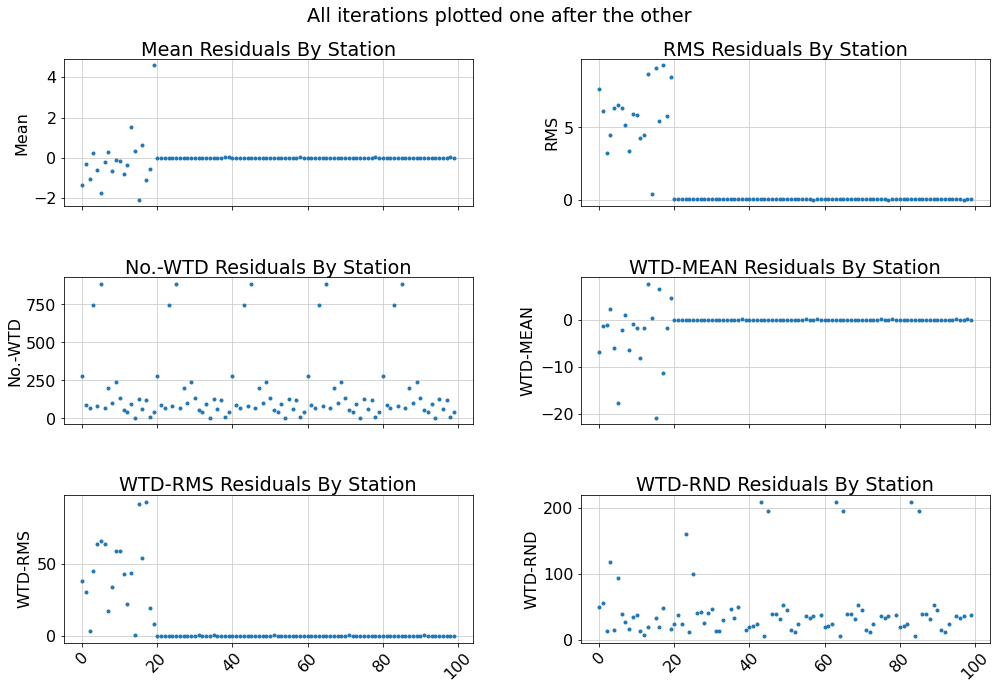

In [ ]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax ) = plt.subplots(3,2, figsize=(15,10), sharex=True)
fig.suptitle('All iterations plotted one after the other')
ax[0,0].set_title('Mean Residuals By Station')
ax[0,0].plot(np.arange(0, np.size(full_mean)),full_mean ,'.')
ax[0,0].set(ylabel=  'Mean')  

ax[0,1].set_title('RMS Residuals By Station')
ax[0,1].plot(np.arange(0, np.size(full_RMS)),full_RMS ,'.')
ax[0,1].set(ylabel=  'RMS')  

ax[1,0].set_title('No.-WTD Residuals By Station')
ax[1,0].plot(np.arange(0, np.size(full_no_wtd)),full_no_wtd ,'.')
ax[1,0].set(ylabel=  'No.-WTD')  

ax[1,1].set_title('WTD-MEAN Residuals By Station')
ax[1,1].plot(np.arange(0, np.size(full_wtdmean)),full_wtdmean ,'.')
ax[1,1].set(ylabel=  'WTD-MEAN')  

ax[2,0].set_title('WTD-RMS Residuals By Station')
ax[2,0].plot(np.arange(0, np.size(full_wtdrms)),full_wtdrms ,'.')
ax[2,0].set(ylabel=  'WTD-RMS')  

ax[2,1].set_title('WTD-RND Residuals By Station')
ax[2,1].plot(np.arange(0, np.size(full_wtdrnd)),full_wtdrnd ,'.')
ax[2,1].set(ylabel=  'WTD-RND')  


fig.tight_layout( pad=3.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

    
    

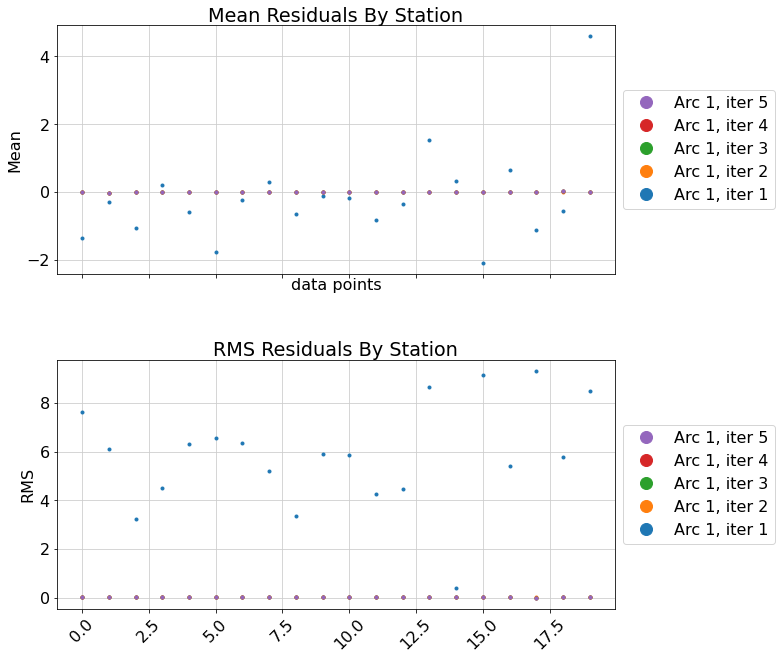

In [ ]:

mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharex=True)
ax1.set_title('Mean Residuals By Station')
ax1.plot(np.arange(0, np.size(A.Mean)),A.Mean.astype(float) ,'.', label = 'Arc 1, iter 1')
ax1.plot(np.arange(0, np.size(B.Mean)),B.Mean.astype(float) ,'.', label = 'Arc 1, iter 2')
ax1.plot(np.arange(0, np.size(C.Mean)),C.Mean.astype(float) ,'.', label = 'Arc 1, iter 3')
ax1.plot(np.arange(0, np.size(D.Mean)),D.Mean.astype(float) ,'.', label = 'Arc 1, iter 4')
ax1.plot(np.arange(0, np.size(E.Mean)),E.Mean.astype(float) ,'.', label = 'Arc 1, iter 5')
# ax1.plot(np.arange(0, np.size(F.Mean)),F.Mean.astype(float) ,'.', label = 'Arc 1, iter 6')
ax1.set(ylabel=  'Mean')  

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 4 )
ax2.set_title('RMS Residuals By Station')
ax2.plot(np.arange(0, np.size(A.RMS)),A.RMS.astype(float) , '.', label = 'Arc 1, iter 1' )
ax2.plot(np.arange(0, np.size(B.RMS)),B.RMS.astype(float) , '.', label = 'Arc 1, iter 2' )
ax2.plot(np.arange(0, np.size(C.RMS)),C.RMS.astype(float) , '.', label = 'Arc 1, iter 3' )
ax2.plot(np.arange(0, np.size(D.RMS)),D.RMS.astype(float) , '.', label = 'Arc 1, iter 4' )
ax2.plot(np.arange(0, np.size(E.RMS)),E.RMS.astype(float) , '.', label = 'Arc 1, iter 5' )
# ax2.plot(np.arange(0, np.size(F.RMS)),F.RMS.astype(float) , '.', label = 'Arc 1, iter 6' )
ax2.set(ylabel=  'RMS')  

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 4 )


ax1.set(xlabel= 'data points') 

fig.tight_layout( pad=3.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

    
    


#### Residuals By Observation

##### Functions:

- for the starlette example there are only observation for iteration 1 and iteration 5 (end)
- the number of observation is found in the "RESIDUAL SUMMARY BY MEASUREMENT" section






In [ ]:

def search_iiesout_all_line_numbers(iieout_file, text_1):
    lines_list = []
    with open(iieout_file, 'r') as f:

        for line_no, line in enumerate(f):
            if text_1 in line:
#                 print(line_no)
                lines_list.append(line_no)
#         line_no_1 =lines_list 
    return(lines_list)   

def create_df_OBSERVATION_RESIDUALS(iieout_file, iteration):
    text = 'OBSERVATION RESIDUALS FOR ARC  1 FOR INNER ITERATION  '+ (iteration)
    num_observations = find_number_of_observations(iieout_file, iteration)

    lines = search_iiesout_all_line_numbers(iieout_file, text)
    line_no_1 = lines[0]
    line_no_2 = lines[-1]
    RESID_OBSERV = pd.read_csv(iieout_file, 
                                       skiprows = line_no_1 + 6 ,  # to 53917
                                         nrows =  int((line_no_2 - line_no_1) ),
                             names = ['YYMMDD', 'HHMM','Sec-UTC-R','Observation', 'Residual','Ratio to sigma','Elev1','Elev2','OBS No.','Block'],
                             sep = '\s+',
                              )
    A = RESID_OBSERV
    A = pd.DataFrame(A)

    for index, row in A.iterrows():
        try:
            float(row['OBS No.'])
            float(row['HHMM'])
        except:
            A=A.drop(index) 
            continue

    last_index = A[A['OBS No.'].astype(float) == num_observations].index[0]
    for i,val in enumerate(np.arange(last_index+1,line_no_2 - line_no_1 )):
        try:
            A=A.drop(val)
        except:
            continue
            #         A=A.drop(index) 

    return(A)   



def find_number_of_observations(iieout_file, iteration):
    text = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

    with open(iieout_file, 'r') as f:
        for line_no, line in enumerate(f):
            if text in line:
#                 print(line_no)
#                 lines_list= (line_no)
                RESID_OBSERV = pd.read_csv(iieout_file, 
                                       skiprows = line_no+2 ,  # to 53917
                                         nrows =  1,
                             names = ['num','NUMBER', 'MEAN','RMS','No.WTD', 'wtd-mean','wtd-rms','Type'],
                             sep = '\s+',
                              )
    RESID_OBSERV['num']    
    return(RESID_OBSERV['num'][0]    ) 


num_observations = find_number_of_observations(iieout_file, '1')
num_observations



def make_datetime_column(resid_df):
    timeHHMM = [] 
    for i,val in enumerate(resid_df['HHMM']):
    #     print(len(val), val)
        if len(val) == 3:
            timehhmm_val = '0'+ val
            timeHHMM.append(timehhmm_val)
        if len(val) == 2:
            timehhmm_val = '00'+ val
            timeHHMM.append(timehhmm_val)
        if len(val) == 4:
            timehhmm_val = val
            timeHHMM.append(timehhmm_val)
#         if len(val) == 0:
#             print('ZERO')
        if len(val) == 1:
    #         print('ONE')
            timehhmm_val = '000'+ val
            timeHHMM.append(timehhmm_val)


    #     print(val[-2:])
    np.shape(timeHHMM)
    resid_df['timeHHMM'] = timeHHMM

    year  = []
    month = []
    day   = []
    for i,val in enumerate(resid_df['YYMMDD']):
        year.append('20' + val[:2])
        month.append(val[2:4])
        day.append(val[4:])
    resid_df['year']  = year
    resid_df['month'] = month
    resid_df['day']   = day

    hours  = []
    minutes = []
    for i,val in enumerate(resid_df['timeHHMM']):
        hours.append(val[:2])
        minutes.append(val[2:4])
    resid_df['hours']  = hours
    resid_df['minutes'] = minutes


    secs  = []
    microsecs = []
    for i,val in enumerate(resid_df['Sec-UTC-R']):
        secs.append(val[:2])

        microsecs.append(val[3:])
    resid_df['secs']  = secs
    resid_df['microsecs'] = microsecs

    fix_decimal = []
    for i,val in enumerate(resid_df['secs'].astype(str)):
    #     print(i,val)
        if val.find('.') == 1:
#             print(i, val)
            fix_decimal.append( '0'+val[:-1])
#             print(newval)
        else:
            fix_decimal.append( val)

    # pd.to_datetime(df['YYYYMMDD'],format='%Y%m%d').add(pd.to_timedelta(df['HH'], 'h'))


    # YYMMDD = pd.to_datetime(Resids_1['YYMMDD'], format ='%y%m%d')

    # pd.to_datetime((Resids_1['timeHHMM']), format ='%H%M' )
    # pd.to_datetime(Resids_1['YYMMDD'], format ='%y%m%d').add(pd.to_datetime((Resids_1['timeHHMM']), format ='%H%M' ) )


    DATE = []
    for i,val in enumerate(resid_df['Residual']):
#         print(i)
        DATE.append(datetime.datetime(year= resid_df['year'].values.astype(int)[i],
                                 month= resid_df['month'].values.astype(int)[i],
                                 day= resid_df['day'].values.astype(int)[i],
                                 hour= resid_df['hours'].values.astype(int)[i],
                                 minute = resid_df['minutes'].values.astype(int)[i],
                                 second = np.int(fix_decimal[i]),
                                 microsecond= resid_df['microsecs'].values.astype(int)[i],
                                ))
    return(DATE)
    
    


# for i,val in enumerate(Resids_1['HHMM']):
# #     print(len(i), i)
#     if len(val) == 3:
#         Resids_1['HHMM'][i] = '0' + val
#         print(Resids_1['HHMM'][i])
#     if len(val) == 2:
#         Resids_1['HHMM'][i] = '0' + val + '0'
#         print(Resids_1['HHMM'][i])


In [ ]:
Resids_1 = create_df_OBSERVATION_RESIDUALS(iieout_file,  np.str(1))

# Resids_2 = create_df_OBSERVATION_RESIDUALS(iieout_file, np.str(2))
# Resids_3 = create_df_OBSERVATION_RESIDUALS(iieout_file, np.str(3))
# Resids_4 = create_df_OBSERVATION_RESIDUALS(iieout_file, np.str(4))

Resids_5 = create_df_OBSERVATION_RESIDUALS(iieout_file,  np.str(5))

full_resid = pd.concat([Resids_1.Residual,
#                         Resids_2.Residual,
#                         Resids_3.Residual,
#                         Resids_4.Residual,
                        Resids_5.Residual])

full_ratio_to_sigma = pd.concat([Resids_1['Ratio to sigma'],
                        Resids_5['Ratio to sigma']])

full_observation = pd.concat([Resids_1['Observation'],
                        Resids_5['Observation']])


'''Create a date column for '''
date_5 = make_datetime_column(resid_df=Resids_5)
Resids_5['Date'] = date_5

##### Plot Residuals by Observation

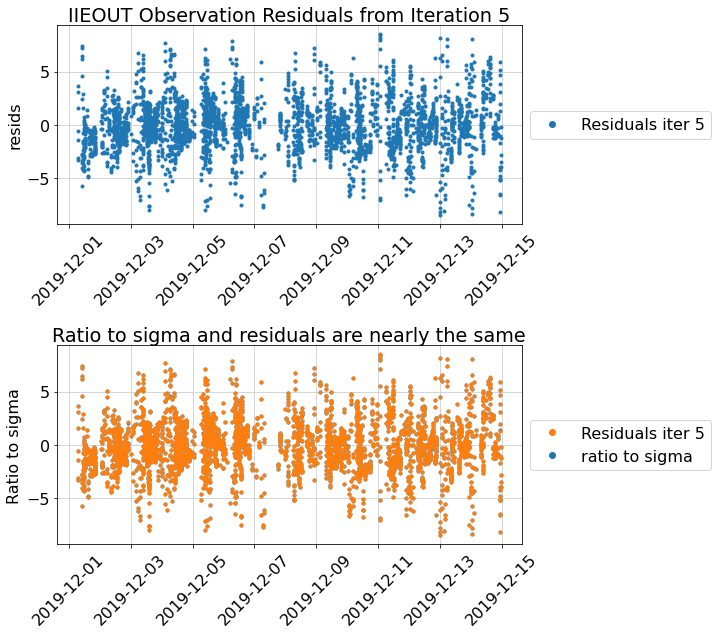

In [ ]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharex=False)
ax1.set_title('IIEOUT Observation Residuals from Iteration 5')
ax1.plot(pd.to_datetime(Resids_5['Date']), Resids_5['Residual'].values.astype(float)*1e2 ,'.', label = 'Residuals iter 5')
ax1.set(ylabel=  'resids')  
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )

ax2.set_title('Ratio to sigma and residuals are nearly the same')
ax2.set(ylabel=  'Ratio to sigma')  
ax2.plot(pd.to_datetime(Resids_5['Date']), Resids_5['Ratio to sigma'].values.astype(float)*1e2 ,'.', label = 'ratio to sigma')
ax2.plot(pd.to_datetime(Resids_5['Date']), Resids_5['Residual'].values.astype(float)*1e2 ,'.', label = 'Residuals iter 5')

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


# # ax2.set(xlabel= 'Modified Julian Date') 
# ax2.set(xlabel= 'Date') 

fig.tight_layout( pad=5.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


## Compare IIEOUT file with FORT19 Residual File

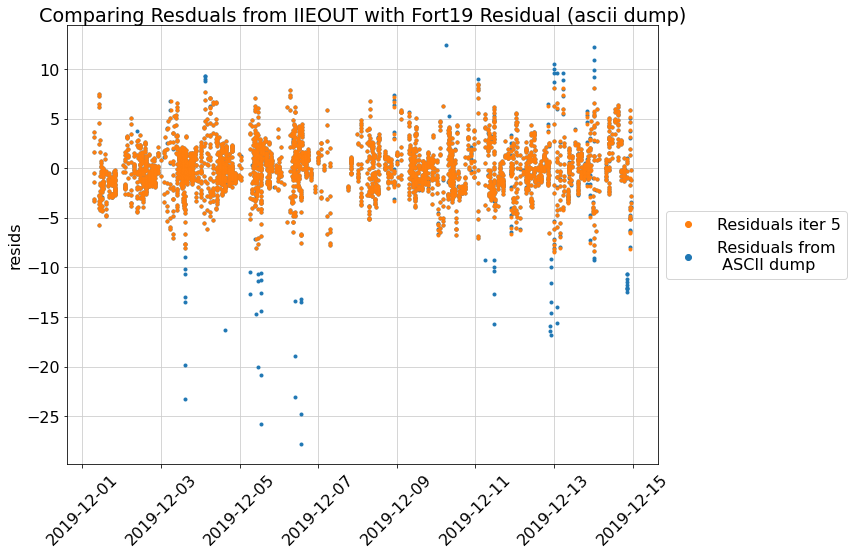

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1) = plt.subplots(1, figsize=(13,8), sharex=False)
ax1.set_title('Comparing Resduals from IIEOUT with Fort19 Residual (ascii dump)')
# ax1.plot(np.arange(0, np.size(ResidMeas_ARC_1_INNER_ITERATION_1.Mean)),ResidMeas_ARC_1_INNER_ITERATION_1.Mean.astype(float) , label = 'Arc 1, iter 1')
ax1.plot(pd.to_datetime(resid_ascii['Date']), resid_ascii['RESIDUAL'] ,'.', label = 'Residuals from \n ASCII dump')
ax1.plot(pd.to_datetime(Resids_5['Date']), Resids_5['Residual'].values.astype(float)*1e2 ,'.', label = 'Residuals iter 5')
ax1.set(ylabel=  'resids')  
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )

fig.tight_layout( pad=3.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

    
    
